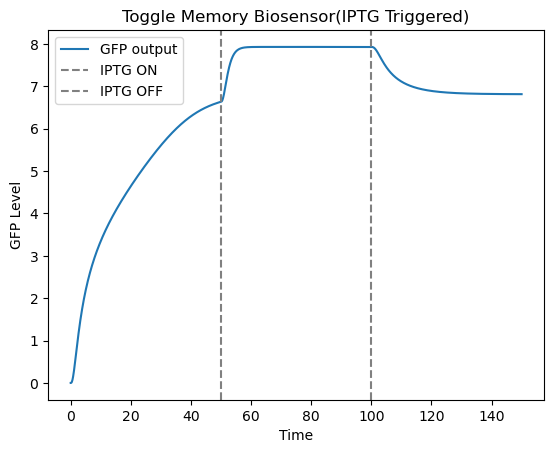

In [13]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

model = te.loada("""
model Toggle_Memory_Biosensor()
// Species
species A, B, IPTG, GFP

// Parameters
k = 10 // production rate
K = 5 // repression threshold
d = 1 // degradation rate
n = 2 // hill coefficient
                 
// Initial conditions
A = 10 // A is high at start
B = 0
GFP = 0
IPTG = 0 // no signal initially
                 
// A represses B
J1: -> B; k/(1+(A/K)^n)
J2: B -> ; d*B

// B repressses A
J3: -> A; k/(1+(B/K)^n)
J4: A -> ; d*A

// IPTG temporarily represses A
J5: A -> ; IPTG*A*0.2

// B activates GFP
J6: -> GFP; k*(B^n/(K^n+B^n))
J7: GFP -> ; d*GFP
                 
// Weak constant expression of B to help it flip
J8: -> B; 0.2
end
""")

# No IPTG -> A dominates, no GFP
model.reset()
model.IPTG = 0
r1 = model.simulate(0, 50, 500)

# IPTG present -> activates switch
model.reset()
model.A = r1[-1][1]
model.B = r1[-1][2]
model.GFP = r1[-1][4]
model.IPTG = 5
r2 = model.simulate(0, 50, 500)

#IPTG removed -> memory still holds
model.reset()
model.A = r2[-1][1]
model.B = r2[-1][2]
model.GFP = r2[-1][4]
model.IPTG = 0
r3 = model.simulate(0, 50, 500)

r_combined = np.vstack((
    np.column_stack((r1[:,0], r1[:,4])),
    np.column_stack((r2[:,0]+50, r2[:,4])),
    np.column_stack((r3[:,0]+100, r3[:,4]))
))

plt.plot(r_combined[:,0], r_combined[:,1], label="GFP output")
plt.axvline(50, color='gray', linestyle='--', label="IPTG ON")
plt.axvline(100, color='gray', linestyle='--', label="IPTG OFF")
plt.xlabel("Time")
plt.ylabel("GFP Level")
plt.title("Toggle Memory Biosensor(IPTG Triggered)")
plt.savefig("toggle_memory_biosensor.png", dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

                